# P2. Clasificación

Este reporte aborda un análisis de datos proporcionados por Kaggle en el contexto de la competencia "Spaceship Titanic" (https://www.kaggle.com/competitions/spaceship-titanic). A lo largo de este proyecto, desarrollaré y evaluaré varios modelos de clasificación utilizando diferentes enfoques de machine learning. Las variables disponibles en la base de datos incluyen:

* PassengerId: Identificador único de cada pasajero.

* HomePlanet: Planeta de origen del pasajero.

* CryoSleep: Indica si el pasajero estaba en criosueño durante el viaje (sí/no).

* Cabin: Número de cabina asignado al pasajero.

* Destination: Destino final del pasajero.

* Age: Edad del pasajero.

* VIP: Indica si el pasajero es una persona VIP (sí/no).

* RoomService: Gasto del pasajero en el servicio de habitación durante el viaje.

* FoodCourt: Gasto del pasajero en el área de comida.

* ShoppingMall: Gasto del pasajero en el centro comercial.

* Spa: Gasto del pasajero en el spa.

* VRDeck: Gasto del pasajero en el área de VR (realidad virtual).

* Name: Nombre del pasajero.

* Transported: Variable objetivo que indica si el pasajero fue transportado exitosamente (1) o no (0).

Se implementarán modelos de regresión logística multinomial, Análisis Discriminante Lineal (LDA), árboles de decisión, y métodos de ensemble, evaluando la calidad de cada uno mediante validación cruzada. Finalmente, se seleccionará el mejor modelo y se utilizará para predecir las clases de los datos de prueba, evaluando su desempeño a través de la métrica de exactitud (accuracy).

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


A continuación, procederé a importar los datos de entrenamiento al entorno de trabajo. Una vez cargados los datos, realizaré una exploración inicial para revisar las características generales de la base de datos. También verificaré si existen valores faltantes o "huecos" en los datos, lo cual podría afectar el análisis posterior. Prepararé los datos para el análisis, lo que incluye la limpieza de datos, la imputación de valores faltantes y la codificación de variables categóricas. Esto es fundamental para garantizar que los modelos de machine learning puedan procesar los datos correctamente.

In [22]:
# Cargar los datos de entrenamiento
df = pd.read_csv("train.csv")

# Mostrar las primeras filas del dataset
display(df.head())

# Información general sobre las variables
display(df.info())


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None

In [23]:
# Identificar variables cualitativas y cuantitativas
qualitative = df.select_dtypes(include=['object']).columns.tolist()
quantitative = df.select_dtypes(exclude=['object']).columns.tolist()
print(f"Variables cualitativas: {qualitative}")
print(f"Variables cuantitativas: {quantitative} \n")

for col in qualitative:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} clases únicas")

Variables cualitativas: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
Variables cuantitativas: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'] 

PassengerId: 8693 clases únicas
HomePlanet: 3 clases únicas
CryoSleep: 2 clases únicas
Cabin: 6560 clases únicas
Destination: 3 clases únicas
VIP: 2 clases únicas
Name: 8473 clases únicas


In [24]:
# Eliminar columnas innecesarias
df.drop(columns=["PassengerId", "Name", "Cabin"], inplace=True)

# Ver cantidad de valores nulos por columna
print("Valores nulos por columna:")
display(df.isnull().sum())

# Eliminar valores nulos
df.dropna(inplace=True)

Valores nulos por columna:


HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [25]:
# Convertir variables categóricas a dummies
df = pd.get_dummies(df, columns=["HomePlanet", "Destination"], drop_first=True)

# Descripción estadística de las variables numéricas
display(df.describe())

df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000
mean,28.891665,226.079590,480.432760,179.328037,318.185035,303.768309
std,14.514540,673.908258,1672.766209,633.614987,1159.247480,1125.448364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,81.500000,29.000000,65.500000,51.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,20336.000000


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,False,True
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,False,False,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,True
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,True
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,True,False,False,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,False,False,True,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,False,False,False,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,True,False,False,False


Se separan las variables independientes de la variable dependiente, que en este caso es "Transported". Luego, se dividen los datos en conjuntos de entrenamiento y prueba. Esto es esencial para evaluar el rendimiento de los modelos de machine learning y evitar el sobreajuste. Al igual, se define una funcion para las métricas de rendimiento, que nos ayudaran a evaluar los modelos.

In [26]:
# Separar características y variable objetivo
X = df.drop("Transported", axis=1)
y = df["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Función para evaluar modelos
def evaluate_model( y_test, y_pred, model_name): 
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}\n")
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    return acc, prec, rec, f1


Se implementará un modelo de regresión logística multinomial, un enfoque clásico para problemas de clasificación. Se evaluará su desempeño utilizando validación cruzada y se analizarán sus métricas de clasificación para determinar su efectividad en la predicción de los datos.

Logistic Regression Multinomial Metrics:
Accuracy: 0.7856
Precision: 0.7361
Recall: 0.8937
F1-score: 0.8073



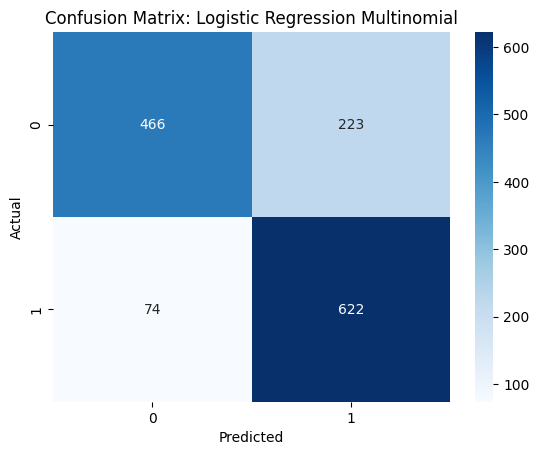

Cross-Validation Accuracy: 0.7811 ± 0.0094


In [27]:
# Crear el modelo de regresión logística multinomial
model = LogisticRegression(solver="saga", max_iter=5000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo con la función dada
evaluate_model(y_test, y_pred, "Logistic Regression Multinomial")

# Validación cruzada con 5 folds
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

# Mostrar resultados de validación cruzada
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

El modelo de regresión logística multinomial obtuvo una exactitud del 78.56%, lo que indica un desempeño sólido en la clasificación de los datos. Sus métricas adicionales reflejan un precision de 0.7361, un recall de 0.8937 y un F1-score de 0.8073, lo que sugiere que el modelo tiene una alta capacidad para identificar correctamente los casos positivos, aunque con un ligero sacrificio en precisión. La validación cruzada arrojó un accuracy promedio de 0.7811 ± 0.0094, lo que indica estabilidad en distintos subconjuntos de datos. 

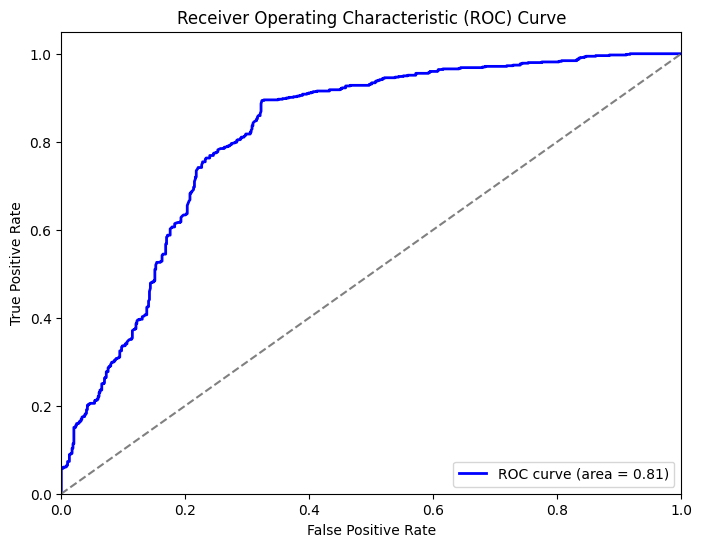

In [28]:
# Calcular probabilidades de predicción
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Además, la curva ROC con un AUC de 0.81 muestra una buena capacidad de discriminación entre clases. En general, el modelo ofrece un rendimiento equilibrado, aunque su alto recall muestra que se  esta clasificando mas casos como positivos, lo que podría afectar su confiabilidad en ciertos escenarios. Su comparación con otras metodologías permitirá evaluar si es la mejor opción o si existen enfoques más efectivos.

Se generará un modelo de LDA, el cual busca maximizar la separación entre clases al proyectar los datos en un espacio de menor dimensión. Su desempeño será evaluado mediante validación cruzada y se compararán sus resultados con los obtenidos en la regresión logística para identificar diferencias.

Linear Discriminant Analysis (LDA) Metrics:
Accuracy: 0.7762
Precision: 0.8185
Recall: 0.7126
F1-score: 0.7619



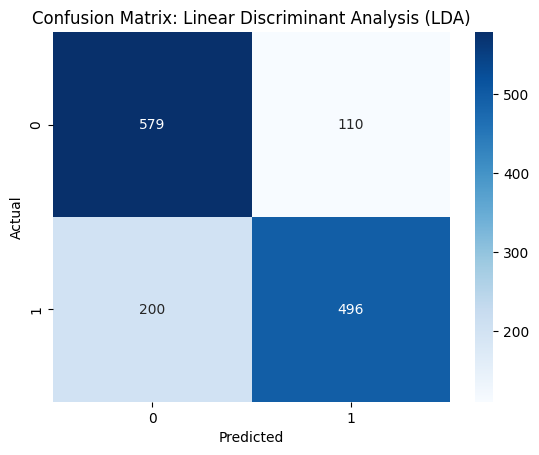

LDA Cross-Validation Accuracy: 0.7622 ± 0.0105


In [29]:
# Crear el modelo LDA
lda_model = LinearDiscriminantAnalysis()

# Entrenar el modelo
lda_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_lda = lda_model.predict(X_test)

# Evaluar el modelo con la función dada
evaluate_model(y_test, y_pred_lda, "Linear Discriminant Analysis (LDA)")

# Validación cruzada con 5 folds
cv_scores_lda = cross_val_score(lda_model, X_train, y_train, cv=5, scoring="accuracy")

# Mostrar resultados de validación cruzada
print(f"LDA Cross-Validation Accuracy: {cv_scores_lda.mean():.4f} ± {cv_scores_lda.std():.4f}")

El modelo de LDA obtuvo una exactitud del 77.62%, ligeramente inferior a la regresión logística multinomial. Sin embargo, mostró una precisión de 0.8185, mayor que la del modelo anterior, lo que indica una menor tasa de falsos positivos. Su recall de 0.7126 es más bajo, lo que sugiere que identifica menos casos positivos en comparación con la regresión logística. El F1-score de 0.7619 refleja un balance entre precisión y recall, aunque menor al de la regresión logística. La validación cruzada dio un accuracy promedio de 0.7622 ± 0.0105, mostrando una estabilidad similar pero con un desempeño ligeramente inferior. 

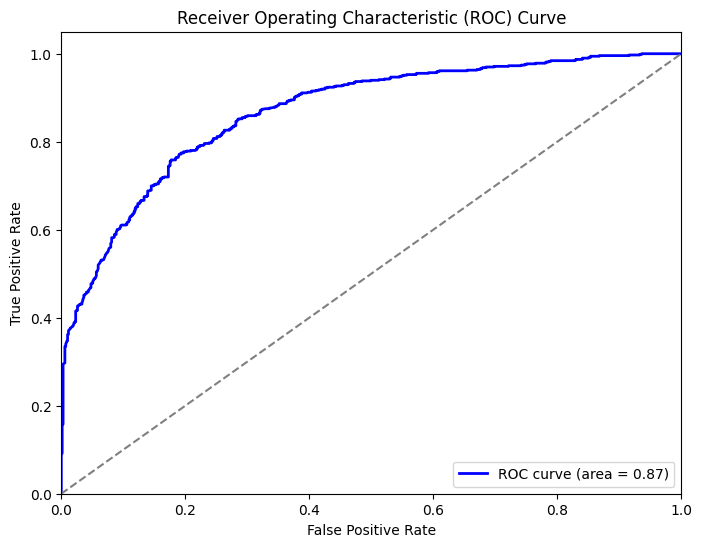

In [30]:
# Calcular probabilidades de predicción
y_probs = lda_model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

No obstante, el modelo destacó en la capacidad de discriminación entre clases con una AUC de 0.87, superior al 0.81 de la regresión logística, lo que indica un mejor rendimiento en términos de la curva ROC. En general, aunque el LDA es más preciso en sus predicciones positivas y tiene mejor capacidad de discriminación, su menor recall y exactitud podrían hacer que la regresión logística sea una opción más equilibrada dependiendo del contexto del problema.

Se construirá un modelo de árbol de decisión, un enfoque interpretativo que permite capturar relaciones no lineales en los datos. Se analizará su rendimiento en términos de exactitud y estabilidad utilizando validación cruzada, y se comparará con las metodologías previas para evaluar su efectividad.

Decision Tree Metrics:
Accuracy: 0.7451
Precision: 0.7296
Recall: 0.7830
F1-score: 0.7554



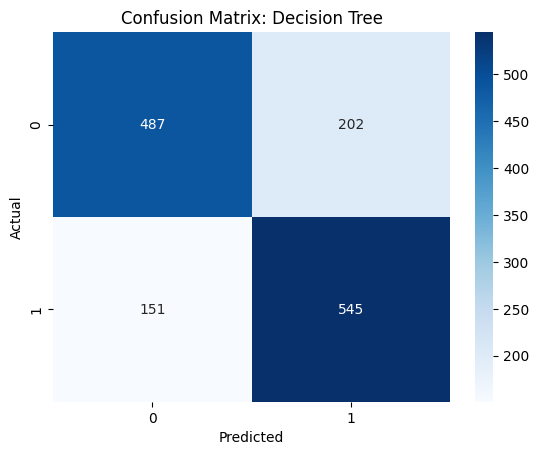

Decision Tree Cross-Validation Accuracy: 0.7322 ± 0.0032


In [31]:
# Crear el modelo de árbol de decisión
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
dt_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_dt = dt_model.predict(X_test)

# Evaluar el modelo con la función dada
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Validación cruzada con 5 folds
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring="accuracy")

# Mostrar resultados de validación cruzada
print(f"Decision Tree Cross-Validation Accuracy: {cv_scores_dt.mean():.4f} ± {cv_scores_dt.std():.4f}")

El modelo de Árbol de Decisión obtuvo una exactitud de 74.51%, inferior a los modelos de regresión logística y LDA, lo que indica un menor desempeño general en la clasificación. Su precisión de 0.7296 es similar a la de la regresión logística pero menor que la de LDA, mientras que su recall de 0.7830 es superior al de LDA pero menor que el de la regresión logística, sugiriendo un balance intermedio en la identificación de casos positivos. Su F1-score de 0.7554 es el más bajo hasta ahora, reflejando una menor efectividad en la combinación de precisión y recall. La validación cruzada arrojó un accuracy promedio de 0.7322 ± 0.0032, con menor estabilidad en comparación con los modelos anteriores.

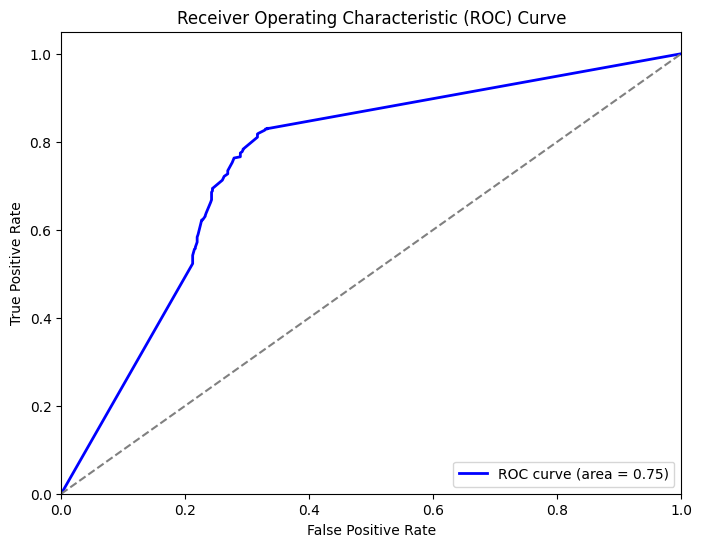

In [32]:
# Calcular probabilidades de predicción
y_probs = dt_model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Además, su AUC de 0.75 es considerablemente inferior a la de los otros modelos, lo que indica una menor capacidad de discriminación entre clases. En general, aunque el árbol de decisión tiene una estructura interpretable y puede capturar relaciones no lineales, su desempeño en este caso es inferior al de la regresión logística y LDA, por lo que no parece ser la mejor opción entre las metodologías evaluadas.

Se implementará un modelo de ensamble, específicamente Random Forest, debido a su capacidad para mejorar la precisión y reducir el sobreajuste combinando múltiples árboles de decisión. Se evaluará su rendimiento con validación cruzada y se comparará con los modelos anteriores.

Random Forest Metrics:
Accuracy: 0.7986
Precision: 0.7966
Recall: 0.8046
F1-score: 0.8006



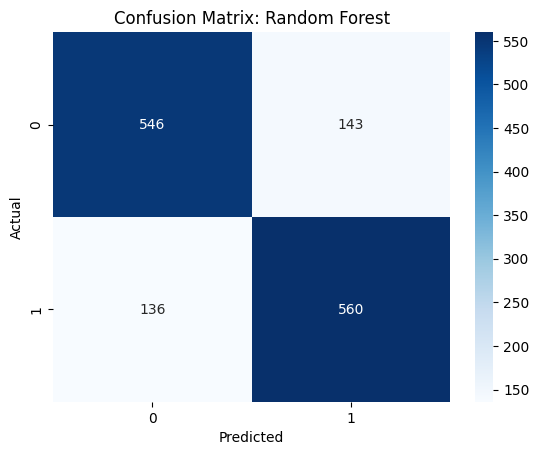

Random Forest Cross-Validation Accuracy: 0.7811 ± 0.0056


In [33]:
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo con la función dada
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Validación cruzada con 5 folds
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="accuracy")

# Mostrar resultados de validación cruzada
print(f"Random Forest Cross-Validation Accuracy: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")


El modelo de Random Forest obtuvo una exactitud de 79.86%, superando a todas las metodologías previas en términos de precisión global. Su precisión de 0.7966 y recall de 0.8046 muestran un buen equilibrio entre minimizar falsos positivos y capturar correctamente los casos positivos, resultando en un F1-score de 0.8006, el segundo más alto entre los modelos evaluados. La validación cruzada arrojó un accuracy promedio de 78.11% ± 0.0056, similar a la regresión logística pero con menor variabilidad, lo que sugiere estabilidad en el desempeño. 

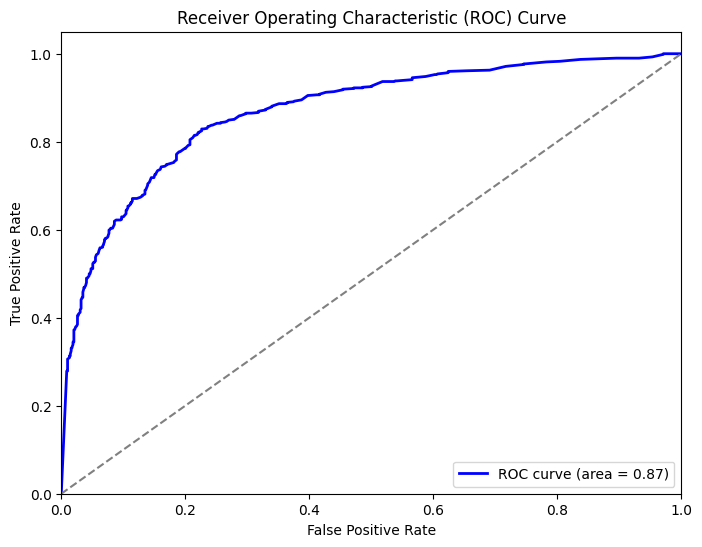

In [34]:
# Calcular probabilidades de predicción
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Además, su AUC de 0.87, igual al del modelo LDA, indica una de las mejores capacidades de discriminación entre clases. En comparación con las metodologías anteriores, Random Forest se muestras como un modelo robusto y efectivo para la clasificación de los datos de forma balanceada para identificar clases.

Para la selección del modelo final, se optó por Random Forest, ya que presentó la mayor exactitud (79.86%) entre todas las metodologías evaluadas, cumpliendo con el objetivo principal del trabajo de maximizar el número de predicciones correctas. Además, su AUC de 0.87, uno de los más altos, demuestra una excelente capacidad de discriminación entre clases. También destacó por su equilibrio entre precisión (0.7966) y recall (0.8046), lo que lo convierte en un modelo robusto y confiable. Su desempeño en validación cruzada (78.11% ± 0.0056) reafirma su estabilidad, siendo una opción superior en comparación con la regresión logística, LDA y el árbol de decisión. Con base en estos resultados, se utilizará Random Forest para realizar las predicciones finales sobre los datos de prueba, asegurando la mejor calidad en términos de exactitud.

In [38]:
# Cargar los datos de entrenamiento
df_test = pd.read_csv("test.csv")

# Eliminar columnas innecesarias
df_test.drop(columns=["Name", "Cabin"], inplace=True)

# Convertir variables categóricas a dummies
df_test = pd.get_dummies(df_test, columns=["HomePlanet", "Destination"], drop_first=True)

x_test = df_test.drop("PassengerId", axis=1)

# Creacion de csv de predicciones
predictions = rf_model.predict(x_test)
submission = pd.DataFrame({"PassengerId": df_test["PassengerId"], "Transported": predictions})
submission.to_csv("submission.csv", index=False)

# Mostrar las primeras filas del archivo de predicciones
display(submission.head())


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


Se utilizo la ayuda de ChatGPT para generar el código y como base en las interpretaciones de los resultados, pero se realizaron modificaciones para adaptarlo a mis necesidades.

**Firma de honor:**  "Doy mi palabra que he realizado esta actividad con integridad académica" - Daniel Matthieu Potes Lesoinne #584678